<a href="https://colab.research.google.com/github/torrozz/Graduation/blob/main/Graduation_verBreast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Sat May 24 03:30:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Upload file json
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nguyntntjason","key":"a77661f4fc309da9ac836ae66d9cbd10"}'}

In [ ]:
# C√†i ƒë·∫∑t kaggle CLI
!pip install -q kaggle

# T·∫°o th∆∞ m·ª•c v√† di chuy·ªÉn file json v√†o v·ªã tr√≠ m·∫∑c ƒë·ªãnh
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# T·∫£i file zip t·ª´ Kaggle dataset Paul Mooney
!kaggle datasets download -d paultimothymooney/breast-histopathology-images


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
 97% 3.01G/3.10G [01:24<00:06, 13.2MB/s]
100% 3.10G/3.10G [01:25<00:00, 39.1MB/s]


In [ ]:
# Gi·∫£i n√©n d·ªØ li·ªáu
!unzip breast-histopathology-images.zip -d breast_histopathology_data


Streaming output truncated to the last 5000 lines.
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: breast_histopathology_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: 

In [ ]:
# ƒê·∫øm s·ªë th∆∞ m·ª•c b·ªánh nh√¢n
!find breast_histopathology_data/IDC_regular_ps50_idx5 -type d | wc -l

# Xem v√†i file ƒë·∫ßu ti√™n
!find breast_histopathology_data/IDC_regular_ps50_idx5 -type f | head -10


838
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x2101_y2001_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x1751_y2051_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x751_y701_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x2251_y151_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x2551_y2001_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x901_y1001_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x1551_y2351_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x501_y401_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x2251_y1951_class0.png
breast_histopathology_data/IDC_regular_ps50_idx5/12955/0/12955_idx5_x1001_y751_class0.png


In [ ]:
import os
import shutil
import random
from pathlib import Path

# ƒê∆∞·ªùng d·∫´n t·ªõi th∆∞ m·ª•c d·ªØ li·ªáu ƒë√£ gi·∫£i n√©n
source_dir = Path("breast_histopathology_data")

# Th∆∞ m·ª•c ƒë√≠ch ch·ª©a d·ªØ li·ªáu ƒë√£ s·∫Øp x·∫øp
base_dir = Path("working_dir/data")
train_dir = base_dir / "train"
valid_dir = base_dir / "valid"

# T·∫°o c·∫•u tr√∫c th∆∞ m·ª•c train/valid v√† nh√£n 0, 1
for split in [train_dir, valid_dir]:
    (split / "0").mkdir(parents=True, exist_ok=True)
    (split / "1").mkdir(parents=True, exist_ok=True)

# Gom danh s√°ch c√°c ·∫£nh (v·ªõi label t∆∞∆°ng ·ª©ng: 0 ho·∫∑c 1)
image_paths = []
for patient_dir in source_dir.iterdir():
    if patient_dir.is_dir():
        for label_dir in patient_dir.iterdir():
            if label_dir.name in ['0', '1']:
                for img_file in label_dir.iterdir():
                    image_paths.append((img_file, label_dir.name))

# Shuffle v√† chia 80% train - 20% valid
random.seed(42)
random.shuffle(image_paths)
split_idx = int(len(image_paths) * 0.8)
train_set = image_paths[:split_idx]
valid_set = image_paths[split_idx:]

# H√†m copy ·∫£nh
def copy_images(dataset, target_dir):
    for img_path, label in dataset:
        dst = target_dir / label / img_path.name
        shutil.copy(img_path, dst)

# Th·ª±c hi·ªán sao ch√©p ·∫£nh
copy_images(train_set, train_dir)
copy_images(valid_set, valid_dir)

print(f"‚úÖ ƒê√£ s·∫Øp x·∫øp {len(train_set)} ·∫£nh v√†o t·∫≠p hu·∫•n luy·ªán v√† {len(valid_set)} ·∫£nh v√†o t·∫≠p validation.")


‚úÖ ƒê√£ s·∫Øp x·∫øp 222019 ·∫£nh v√†o t·∫≠p hu·∫•n luy·ªán v√† 55505 ·∫£nh v√†o t·∫≠p validation.


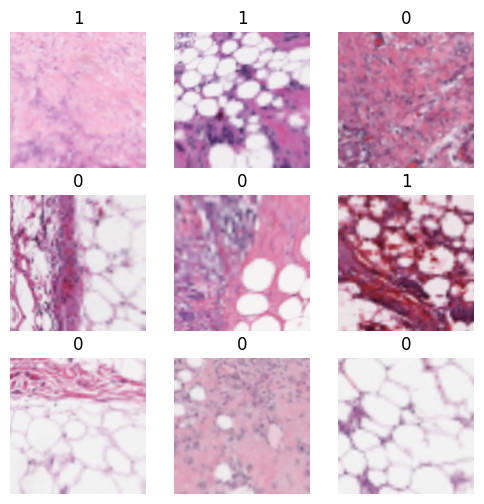

In [ ]:
from fastai.vision.all import *

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn th∆∞ m·ª•c ch·ª©a ·∫£nh ƒë√£ chia train/valid
data_path = Path("working_dir/data")

# T·∫°o DataLoaders t·ª´ th∆∞ m·ª•c v·ªõi c√°c augmentation gi·ªëng nh∆∞ tr∆∞·ªõc
dls = ImageDataLoaders.from_folder(
    data_path,
    train='train',
    valid='valid',
    item_tfms=Resize(460),  # Resize l·ªõn tr∆∞·ªõc khi crop ƒë·ªÉ gi·ªØ chi ti·∫øt
    batch_tfms=aug_transforms(
        size=224,            # Sau ƒë√≥ crop 224x224 ph√π h·ª£p ResNet50
        flip_vert=True,
        max_rotate=20,
        max_zoom=1.2,
        max_lighting=0.3,
        max_warp=0.3,
        p_affine=0.75,
        p_lighting=0.75
    ),
    bs=64  # Batch size nh∆∞ b·∫°n d√πng tr∆∞·ªõc
)

# Ki·ªÉm tra l·∫°i 1 batch ·∫£nh
dls.show_batch(max_n=9, figsize=(6,6))


In [ ]:
# Kh·ªüi t·∫°o m√¥ h√¨nh learner v·ªõi ResNet50
learn = cnn_learner(
    dls,                # DataLoaders ƒë√£ t·∫°o ·ªü b∆∞·ªõc 4
    resnet50,           # Backbone CNN
    metrics=accuracy,   # ƒêo l∆∞·ªùng accuracy
    pretrained=True     # D√πng tr·ªçng s·ªë pre-trained ImageNet
)




In [ ]:
# Hu·∫•n luy·ªán m√¥ h√¨nh 5 epochs v·ªõi learning rate t·ªëi ∆∞u t√¨m ƒë∆∞·ª£c
learn.fine_tune(5, base_lr=1e-3)


In [ ]:
learn.export("/content/breast_cancer.pkl")


In [ ]:
from google.colab import files
files.download("/content/breast_cancer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

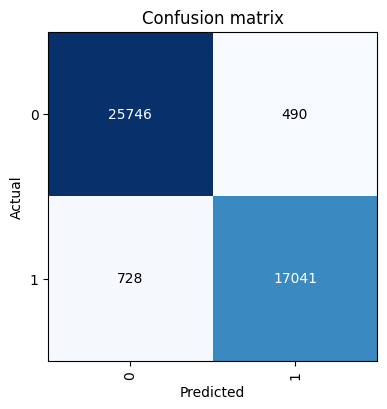

In [ ]:
# Ma tr·∫≠n nh·∫ßm l·∫´n ƒë·ªÉ xem d·ª± ƒëo√°n ƒë√∫ng/sai
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)


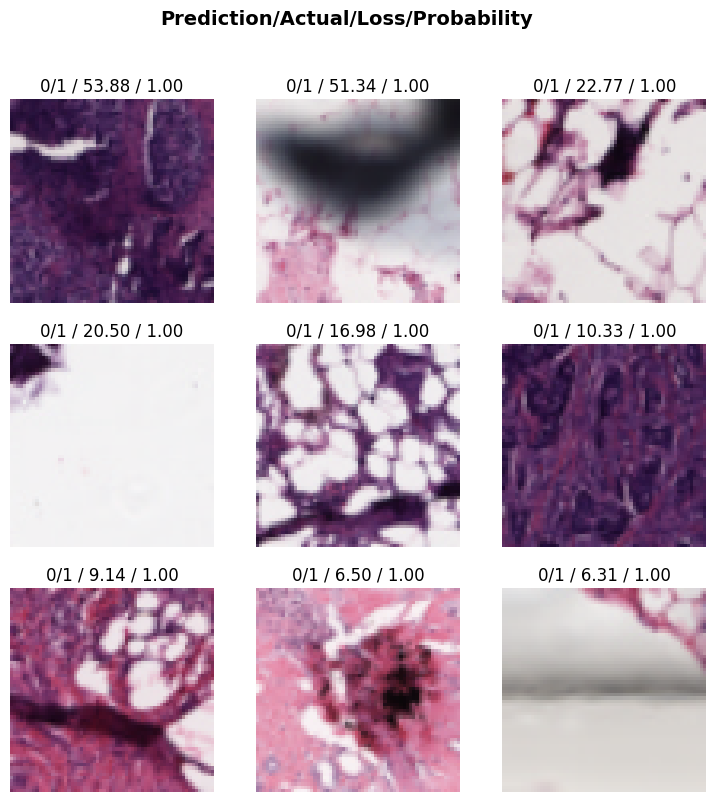

In [ ]:
interp.plot_top_losses(9, nrows=3, figsize=(9,9))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# L·∫•y nh√£n th·ª±c v√† x√°c su·∫•t d·ª± ƒëo√°n l·ªõp 1 (IDC)
preds, targs = learn.get_preds()
pred_probs = preds[:,1]  # X√°c su·∫•t cho l·ªõp 1


In [ ]:
# T√≠nh FPR, TPR
fpr, tpr, _ = roc_curve(targs, pred_probs)
roc_auc = auc(fpr, tpr)


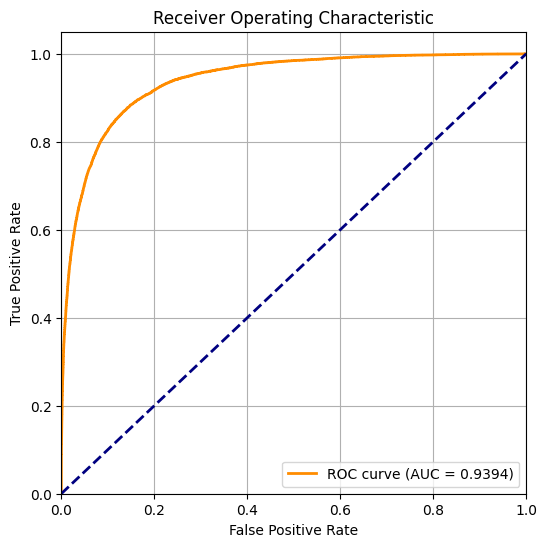

In [ ]:
# V·∫Ω ƒë∆∞·ªùng cong ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
learn.export("/content/breast_cancer_model.pkl")


In [ ]:
from google.colab import files
files.download("/content/breast_cancer_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from fastai.vision.all import *

# Load m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán t·ª´ file .pkl
learn = load_learner('metastatic_model.pkl')


In [ ]:
# L∆∞u l·∫°i ch·ªâ ph·∫ßn tr·ªçng s·ªë (state_dict) c·ªßa m√¥ h√¨nh
torch.save(learn.model.state_dict(), 'metastatic_model.pth')


In [ ]:
# T·∫£i file .pth v·ªÅ m√°y
files.download('metastatic_model.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/breast_cancer_model.pkl" /content/

In [ ]:
from fastai.vision.all import *


In [ ]:
learn.fine_tune(1)  # ho·∫∑c learn.fit(1)
learn.recorder.plot_loss()



NameError: name 'learn' is not defined

‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...


Saving 8863_idx5_x1801_y1501_class1.png to 8863_idx5_x1801_y1501_class1.png


üß† D·ª± ƒëo√°n: 1
üìä X√°c su·∫•t Non-IDC (0): 0.3332, IDC (1): 0.6668


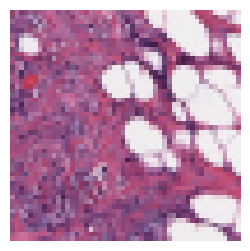

In [ ]:
from fastai.vision.all import *
from google.colab import files

# --- 1. Load m√¥ h√¨nh ƒë√£ upload tr∆∞·ªõc ƒë√≥ ---
learn_inf = load_learner("breast_cancer_model.pkl")

# --- 2. Upload ·∫£nh t·ª´ m√°y ---
print("‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...")
uploaded_img = files.upload()
img_filename = next(iter(uploaded_img))  # l·∫•y t√™n ·∫£nh ƒë·∫ßu ti√™n

# --- 3. D·ª± ƒëo√°n ---
img = PILImage.create(img_filename)
pred_class, pred_idx, probs = learn_inf.predict(img)

# --- 4. Hi·ªÉn th·ªã ·∫£nh v√† k·∫øt qu·∫£ ---
img.show(figsize=(3,3))
print(f"üß† D·ª± ƒëo√°n: {pred_class}")
print(f"üìä X√°c su·∫•t Non-IDC (0): {probs[0]:.4f}, IDC (1): {probs[1]:.4f}")


‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...


Saving 8863_idx5_x1451_y1101_class1.png to 8863_idx5_x1451_y1101_class1.png


üß† D·ª± ƒëo√°n: 1
üìä X√°c su·∫•t Non-IDC (0): 0.0980, IDC (1): 0.9020


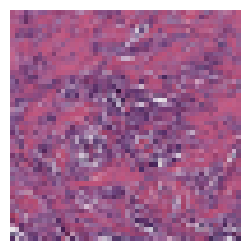

In [ ]:
from fastai.vision.all import *
from google.colab import files

# --- 1. Load m√¥ h√¨nh ƒë√£ upload tr∆∞·ªõc ƒë√≥ ---
learn_inf = load_learner("breast_cancer.pkl")

# --- 2. Upload ·∫£nh t·ª´ m√°y ---
print("‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...")
uploaded_img = files.upload()
img_filename = next(iter(uploaded_img))  # l·∫•y t√™n ·∫£nh ƒë·∫ßu ti√™n

# --- 3. D·ª± ƒëo√°n ---
img = PILImage.create(img_filename)
pred_class, pred_idx, probs = learn_inf.predict(img)

# --- 4. Hi·ªÉn th·ªã ·∫£nh v√† k·∫øt qu·∫£ ---
img.show(figsize=(3,3))
print(f"üß† D·ª± ƒëo√°n: {pred_class}")
print(f"üìä X√°c su·∫•t Non-IDC (0): {probs[0]:.4f}, IDC (1): {probs[1]:.4f}")

‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...


Saving 8863_idx5_x1801_y1501_class1.png to 8863_idx5_x1801_y1501_class1 (1).png


üß† D·ª± ƒëo√°n: 1
üìä X√°c su·∫•t Non-IDC (0): 0.3332, IDC (1): 0.6668
üëâ B·∫°n c√≥ mu·ªën d·ª± ƒëo√°n ·∫£nh kh√°c kh√¥ng? (y/n): y
‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...


Saving 8867_idx5_x1251_y1151_class1.png to 8867_idx5_x1251_y1151_class1 (1).png


üß† D·ª± ƒëo√°n: 0
üìä X√°c su·∫•t Non-IDC (0): 0.6707, IDC (1): 0.3293
üëâ B·∫°n c√≥ mu·ªën d·ª± ƒëo√°n ·∫£nh kh√°c kh√¥ng? (y/n): y
‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...


Saving 8867_idx5_x1151_y1001_class1.png to 8867_idx5_x1151_y1001_class1.png


üß† D·ª± ƒëo√°n: 1
üìä X√°c su·∫•t Non-IDC (0): 0.2391, IDC (1): 0.7609
üëâ B·∫°n c√≥ mu·ªën d·ª± ƒëo√°n ·∫£nh kh√°c kh√¥ng? (y/n): y
‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...


Saving 8867_idx5_x1101_y1051_class1.png to 8867_idx5_x1101_y1051_class1.png


üß† D·ª± ƒëo√°n: 1
üìä X√°c su·∫•t Non-IDC (0): 0.2255, IDC (1): 0.7745
üëâ B·∫°n c√≥ mu·ªën d·ª± ƒëo√°n ·∫£nh kh√°c kh√¥ng? (y/n): n
‚úÖ K·∫øt th√∫c d·ª± ƒëo√°n.


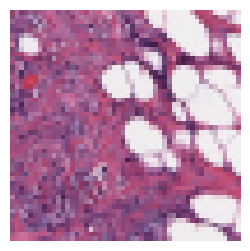

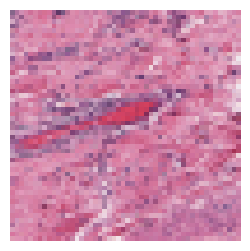

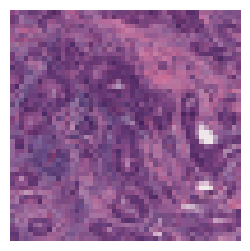

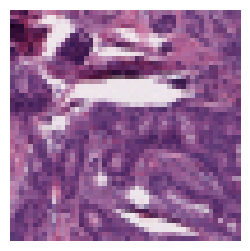

In [ ]:
from fastai.vision.all import *
from google.colab import files

# --- 1. Load m√¥ h√¨nh ƒë√£ c√≥ ---
learn_inf = load_learner("breast_cancer_model.pkl")

# --- 2. L·∫∑p d·ª± ƒëo√°n ·∫£nh li√™n t·ª•c ---
while True:
    print("‚¨ÜÔ∏è Upload ·∫£nh c·∫ßn d·ª± ƒëo√°n...")
    uploaded_img = files.upload()
    if not uploaded_img:
        print("üö´ Kh√¥ng c√≥ ·∫£nh n√†o ƒë∆∞·ª£c upload. K·∫øt th√∫c.")
        break

    img_filename = next(iter(uploaded_img))  # l·∫•y t√™n file ƒë·∫ßu ti√™n
    img = PILImage.create(img_filename)

    # D·ª± ƒëo√°n
    pred_class, pred_idx, probs = learn_inf.predict(img)

    # Hi·ªÉn th·ªã ·∫£nh + k·∫øt qu·∫£
    img.show(figsize=(3,3))
    print(f"üß† D·ª± ƒëo√°n: {pred_class}")
    print(f"üìä X√°c su·∫•t Non-IDC (0): {probs[0]:.4f}, IDC (1): {probs[1]:.4f}")

    # H·ªèi ng∆∞·ªùi d√πng c√≥ mu·ªën ti·∫øp t·ª•c?
    again = input("üëâ B·∫°n c√≥ mu·ªën d·ª± ƒëo√°n ·∫£nh kh√°c kh√¥ng? (y/n): ").lower()
    if again != 'y':
        print("‚úÖ K·∫øt th√∫c d·ª± ƒëo√°n.")
        break


In [ ]:
from fastai.vision.all import *

# T·∫£i l·∫°i m√¥ h√¨nh t·ª´ file ƒë√£ l∆∞u
learn_inf = load_learner("/content/breast_cancer_model.pkl")

# D·ª± ƒëo√°n 1 ·∫£nh c·ª• th·ªÉ t·ª´ t·∫≠p validation
img = PILImage.create("/content/working_dir/data/valid/1/10253_idx5_x501_y401_class1.png")

# Th·ª±c hi·ªán d·ª± ƒëo√°n
pred_class, pred_idx, probs = learn_inf.predict(img)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print(f"üß† D·ª± ƒëo√°n: {pred_class}")
print(f"üìä X√°c su·∫•t Non-IDC (0): {probs[0]:.4f}, IDC (1): {probs[1]:.4f}")


üß† D·ª± ƒëo√°n: 0
üìä X√°c su·∫•t Non-IDC (0): 0.5754, IDC (1): 0.4246


In [ ]:
# 1. Load l·∫°i DataLoaders gi·ªëng nh∆∞ l√∫c train
dls = ImageDataLoaders.from_folder(
    "/content/working_dir/data",
    train="train",
    valid="valid",
    item_tfms=Resize(64),
    batch_tfms=aug_transforms(),
    bs=64
)

# 2. G·∫Øn l·∫°i v√†o learn_inf
learn_inf.dls = dls


In [ ]:
# L·∫•y t·∫•t c·∫£ k·∫øt qu·∫£ d·ª± ƒëo√°n
preds, targs = learn_inf.get_preds()
pred_labels = preds.argmax(dim=1)

# Xu·∫•t file CSV
import pandas as pd
df = pd.DataFrame({
    "Actual": targs,
    "Predicted": pred_labels,
    "Probability_nonIDC": preds[:, 0],
    "Probability_IDC": preds[:, 1]
})
df.to_csv("/content/validation_predictions.csv", index=False)

# T·∫£i file v·ªÅ
from google.colab import files
files.download("/content/validation_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>